### Regresion logistica
a diferencia de la lineal, la variable de salida es categorica, bien 1 o 0 bien categorias (ej hombre mujer); hay una relacion lineal pero con ciertas transformaciones, donde el dato a tener en cuenta es la probabilidad de que un dato este por encima de un umbral, normalmente 0.5 (ver grafico relacion logistica en forma de S de 0 a 1 , con centro en 0.5)

### Las matematicas detras del modelo
es un modelo de probalidad; que P de que un hombre/mujer compre un producto?
### Las tablas de contigencia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/gender-purchase/Gender%20Purchase.csv"
df = pd.read_csv(url)
df.head(5)

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [3]:
# creamos una tabla de contigencia
contigency_table = pd.crosstab(df["Gender"],df["Purchase"])
contigency_table

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [4]:
# podemos hacer la suma, con axis 1 o con axis 0
display(contigency_table.sum(axis=1),contigency_table.sum(axis=0))

Gender
Female    265
Male      246
dtype: int64

Purchase
No     231
Yes    280
dtype: int64

In [5]:
# tambien la proporcion de hombres y mujeres que compran o no (convertimos primero a float sino la division de enteros nos da 1 o 0);
# cada una de las filas se divide por el total
contigency_table.astype("float").div(contigency_table.sum(axis=1),axis=0)


Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


In [6]:
from IPython.display import Math,Latex,display

### Probabilidad condicional
* Cual es la P de que un cliente compre un producto sabiendo que es un hombre?
* Cual es la P de que sabiendo que un cliente compre un producto sea una mujer?

In [7]:
display(Math(r"P(Purchase|Male) = \frac{Numero\ total\ compras\ hechas\ por\ hombre}{Numero\ total\ hombres\ del\ grupo}"))
121/246

&lt;IPython.core.display.Math object&gt;

0.491869918699187

In [8]:
# lo contrario seria cual es la P de que no compre un producto sabiendo que es hombre
display(Math(r"P(No\ Purchase|Male) = 1-P(Purchase|Male)"))
125/246

&lt;IPython.core.display.Math object&gt;

0.508130081300813

In [9]:
# la condicion que conocemos (que haya hecho la compra) va debajo
display(Math(r"P(Female|Purchase) = \frac{Numero\ total\ compras\ hechas\ por\ mujeres}{Numero\ total\ compras} = \frac{Female\cap Purchase}{Purchase}"))
159/280

&lt;IPython.core.display.Math object&gt;

0.5678571428571428

### Ratio de probabilidades
el cociente entre los casos de exito sobre los de fracaso en nuestro suceso y para cada grupo

In [10]:
display(Math(r"P_m = \ Probabilidad\ de\ hacer\ compra\ sabiendo\ que\ es\ un\ hombre"))
display(Math(r"Odds_(Purchase|Male) = \frac{P_m}{1-P_m}"))

&lt;IPython.core.display.Math object&gt;

&lt;IPython.core.display.Math object&gt;

In [11]:
# aqui vemos , al ser menor de 1 el resultado, que los exitos son menores a los fracasos ( si fuera mayor de 1 quiere decir que hay mas extios que fracasos); este dato es importante ya que el modelo lo tendra en cuenta
pm = 121/246
odds_m = pm / (1-pm)# 121/125
odds_m

0.9680000000000002

* ahora, sabiendo esto y la funcion de regresion lineal, tendriamos P = a +b.x, para que la funcion lineal de resultado entre 0 e 1 , debemos ajustar la formula con el logaritmo de P(en esta caso P es la probalidad de exito o fracaso condicionada a la presencia de la variable X)  
* teniendo esta formula ya puedo usar todos los paquetes (sklearn, stamodel etc) que usabamos en la regrsion lineal 

In [12]:
display(Math(r" ln(\frac{P}{1-P}) = \alpha + \beta\cdot X"))

&lt;IPython.core.display.Math object&gt;

### funcion sigmoide

In [13]:
# despejamos la formula, para lograr predecir la probabilidad se recurre a la inversa de la función logística, la cual es llamada función sigmoide.
display(Math(r" P =\frac{1}{1+e^{-(\alpha+\beta\cdot X)}}"))

&lt;IPython.core.display.Math object&gt;

* si a+b.x es muy pequeño(negativo) P tiende a 0
* si a+b.x es 0 P = 0.5
* si a+b.x es muy grande(positivo) P tiende a 1

 el metodo de la maxima verosimilitud para la regresion logistica; usando tanto el metodo de newthon raphson como el de gradiente descendiente (buscan Y=0 en la funcion, lo hacen tirando tangente en los puntos mas cercanos a Y=0 hasta llegar; hallar raices de una ecuacion (donde corta el eje) en una funcion f(x)= 0 )

ver esta enlace para explicacion tecnica
https://www.cienciadedatos.net/documentos/27_regresion_logistica_simple_y_multiple

### analisis exploratio usando regresion logistica


In [14]:
ur = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/bank/bank.csv"
data_bank = pd.read_csv(ur,sep=";")
data_bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [15]:
data_bank.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9

In [16]:
# convierto la columna y (yes/no) a numerica
data_bank["y"] = (data_bank["y"] == "yes").astype(int)

In [17]:
data_bank.iloc[:3,-2:]

,nr.employed,y
0,5099.1,0
1,5191.0,0
2,5228.1,0


In [18]:
# ahora vemos education, como transformalos
data_bank["education"].unique()

array([&#39;basic.9y&#39;, &#39;high.school&#39;, &#39;university.degree&#39;,
       &#39;professional.course&#39;, &#39;basic.6y&#39;, &#39;basic.4y&#39;, &#39;unknown&#39;,
       &#39;illiterate&#39;], dtype=object)

In [19]:
# agrupamos educacion basica
data_bank["education"] = np.where(data_bank["education"] == 'basic.4y',"Basic", data_bank["education"] )
data_bank["education"] = np.where(data_bank["education"] == 'basic.9y',"Basic", data_bank["education"] )
data_bank["education"] = np.where(data_bank["education"] == 'basic.6y',"Basic", data_bank["education"] )
# ahora las otras
data_bank["education"] = np.where(data_bank["education"] == 'high.school',"High School", data_bank["education"] )
data_bank["education"] = np.where(data_bank["education"] == 'professional.course','Professional Course', data_bank["education"] )
data_bank["education"] = np.where(data_bank["education"] == 'illiterate','Illiterate', data_bank["education"] )
data_bank["education"] = np.where(data_bank["education"] == 'university.degree','University Degree', data_bank["education"] )
data_bank["education"] = np.where(data_bank["education"] == 'unknown','Unknown', data_bank["education"] )






In [20]:
data_bank.education.unique()

array([&#39;Basic&#39;, &#39;High School&#39;, &#39;University Degree&#39;, &#39;Professional Course&#39;,
       &#39;Unknown&#39;, &#39;Illiterate&#39;], dtype=object)

In [21]:
# ahora vemos las ventas
data_bank["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [22]:
data_bank.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [23]:
# arriba nos da datos sobre comprador y no comprador; tambien podemos hacer lo mismo pero con los niveles de estudio
data_bank.groupby(["education"]).mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


### graficamos las variables para ver que influencian tienen en la variable a predecir

Text(0.5, 1.0, &#39;Frecuencia de comprar en funcion estudios&#39;)

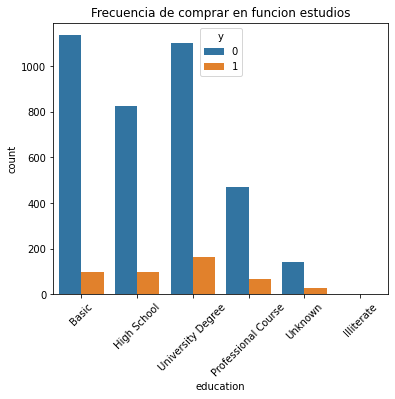

In [24]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.countplot(x="education", data=data_bank,hue="y")
plt.xticks(rotation=45)
plt.title("Frecuencia de comprar en funcion estudios")

Text(0, 0.5, &#39;proporcion de clientes&#39;)

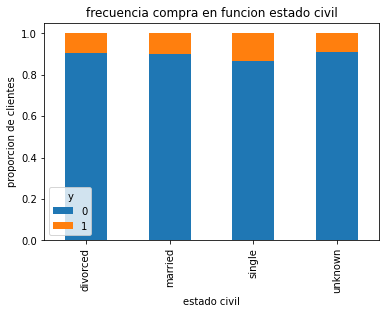

In [25]:
# hacemos lo mismo, pero de forma manual (crosstab) con estado civil
table = pd.crosstab(data_bank.marital, data_bank.y)
table.div(table.sum(axis=1).astype(float),axis=0).plot(kind="bar",stacked=True) # al dividirlo por el total hacemos la proporcion
plt.title("frecuencia compra en funcion estado civil")
plt.xlabel("estado civil")
plt.ylabel("proporcion de clientes")


Text(0.5, 1.0, &#39;Frecuencia de comprar en funcion dia de compra&#39;)

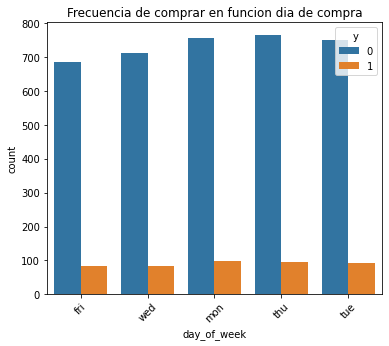

In [26]:
# vemos arriba que no influye mucho el estado civil; ahora vemos los dias de la semana
plt.figure(figsize=(6,5))
sns.countplot(x="day_of_week", data=data_bank,hue="y")
plt.xticks(rotation=45)
plt.title("Frecuencia de comprar en funcion dia de compra")

Text(0.5, 1.0, &#39;Frecuencia de comprar en funcion del mes&#39;)

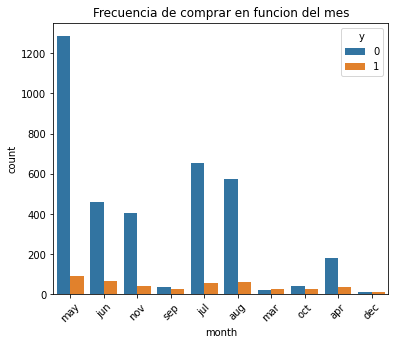

In [27]:
# tampoco hay ningun dia especial de compra; con el mes ??
plt.figure(figsize=(6,5))
sns.countplot(x="month", data=data_bank,hue="y")
plt.xticks(rotation=45)
plt.title("Frecuencia de comprar en funcion del mes")

Text(0.5, 1.0, &#39;Frecuencia de edad&#39;)

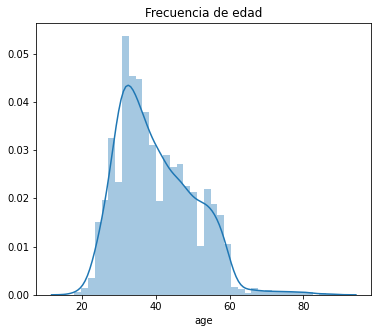

In [28]:
# vemos que en mayo se han rechazado muchos; por edad?
plt.figure(figsize=(6,5))
sns.distplot(data_bank.age)
plt.title("Frecuencia de edad")

### conversion de variables categoricas

In [33]:
categories = list(data_bank.select_dtypes(include="object").columns)
categories

[&#39;job&#39;,
 &#39;marital&#39;,
 &#39;education&#39;,
 &#39;default&#39;,
 &#39;housing&#39;,
 &#39;loan&#39;,
 &#39;contact&#39;,
 &#39;month&#39;,
 &#39;day_of_week&#39;,
 &#39;poutcome&#39;]

In [34]:
for category in categories:
    cat_list = "cat"+"_"+category
    cat_dummies = pd.get_dummies(data_bank[category],prefix=cat_list,drop_first=True)
    data_new = data_bank.join(cat_dummies)
    data_bank = data_new

In [35]:
data_bank.columns.values

array([&#39;age&#39;, &#39;job&#39;, &#39;marital&#39;, &#39;education&#39;, &#39;default&#39;, &#39;housing&#39;, &#39;loan&#39;,
       &#39;contact&#39;, &#39;month&#39;, &#39;day_of_week&#39;, &#39;duration&#39;, &#39;campaign&#39;, &#39;pdays&#39;,
       &#39;previous&#39;, &#39;poutcome&#39;, &#39;emp.var.rate&#39;, &#39;cons.price.idx&#39;,
       &#39;cons.conf.idx&#39;, &#39;euribor3m&#39;, &#39;nr.employed&#39;, &#39;y&#39;,
       &#39;cat_job_blue-collar&#39;, &#39;cat_job_entrepreneur&#39;, &#39;cat_job_housemaid&#39;,
       &#39;cat_job_management&#39;, &#39;cat_job_retired&#39;, &#39;cat_job_self-employed&#39;,
       &#39;cat_job_services&#39;, &#39;cat_job_student&#39;, &#39;cat_job_technician&#39;,
       &#39;cat_job_unemployed&#39;, &#39;cat_job_unknown&#39;, &#39;cat_marital_married&#39;,
       &#39;cat_marital_single&#39;, &#39;cat_marital_unknown&#39;,
       &#39;cat_education_High School&#39;, &#39;cat_education_Illiterate&#39;,
       &#39;cat_education_Pro

In [36]:
# ahora eliminamos las antiguas columnas
data_vars = data_bank.columns.values.tolist()
to_keep = [v for v in data_vars if v not in categories]

In [39]:
bank_data = data_bank[to_keep]
bank_data.columns.values

array([&#39;age&#39;, &#39;duration&#39;, &#39;campaign&#39;, &#39;pdays&#39;, &#39;previous&#39;, &#39;emp.var.rate&#39;,
       &#39;cons.price.idx&#39;, &#39;cons.conf.idx&#39;, &#39;euribor3m&#39;, &#39;nr.employed&#39;, &#39;y&#39;,
       &#39;cat_job_blue-collar&#39;, &#39;cat_job_entrepreneur&#39;, &#39;cat_job_housemaid&#39;,
       &#39;cat_job_management&#39;, &#39;cat_job_retired&#39;, &#39;cat_job_self-employed&#39;,
       &#39;cat_job_services&#39;, &#39;cat_job_student&#39;, &#39;cat_job_technician&#39;,
       &#39;cat_job_unemployed&#39;, &#39;cat_job_unknown&#39;, &#39;cat_marital_married&#39;,
       &#39;cat_marital_single&#39;, &#39;cat_marital_unknown&#39;,
       &#39;cat_education_High School&#39;, &#39;cat_education_Illiterate&#39;,
       &#39;cat_education_Professional Course&#39;,
       &#39;cat_education_University Degree&#39;, &#39;cat_education_Unknown&#39;,
       &#39;cat_default_unknown&#39;, &#39;cat_default_yes&#39;, &#39;cat_housing_unknown&#39;,


In [40]:
## ahora separamos las columnas de la Y para hacer la seleccion de variables para el modelo
bank_data_vars = bank_data.columns.values.tolist()
Y = ["y"]
X = [v for v in bank_data_vars if v not in Y]

### Seleccion de rasgos para el modelo

In [41]:
# empezamos con 12, pero sklearn no la haria de forma automatica
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [45]:
n = 12

In [81]:
# seleccionamos las features, e indicamos el tipo de modelo 
lr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
rfe = RFE(lr,n_features_to_select=n)
rfe = rfe.fit(bank_data[X],bank_data[Y])

In [83]:
# ojo ver un poco los parametros solver, class_weight, max_iter

In [84]:
# aqui vemos cuales features nos quedamos
print(rfe.support_)

[False False False False  True False False False  True False False False
 False False False  True False False False False False False False  True
 False False False False False False False False False  True False False
 False  True  True  True  True  True False False False False False False
 False  True  True]


In [85]:
# aqui nos dicen las probalidades de que se queden en el modelo (si 1 ok)
print(rfe.ranking_)

[31 37 20 39  1 21 27 23  1 33  5  3  9  2  7  1  4 26 29 24 34 17 16  1
 10 36 15 25 18 30 40  6 11  1 19 14 22  1  1  1  1  1  8 35 13 38 28 32
 12  1  1]


In [86]:
z = zip(bank_data_vars,rfe.support_)
list(z)

[(&#39;age&#39;, False),
 (&#39;duration&#39;, False),
 (&#39;campaign&#39;, False),
 (&#39;pdays&#39;, False),
 (&#39;previous&#39;, True),
 (&#39;emp.var.rate&#39;, False),
 (&#39;cons.price.idx&#39;, False),
 (&#39;cons.conf.idx&#39;, False),
 (&#39;euribor3m&#39;, True),
 (&#39;nr.employed&#39;, False),
 (&#39;y&#39;, False),
 (&#39;cat_job_blue-collar&#39;, False),
 (&#39;cat_job_entrepreneur&#39;, False),
 (&#39;cat_job_housemaid&#39;, False),
 (&#39;cat_job_management&#39;, False),
 (&#39;cat_job_retired&#39;, True),
 (&#39;cat_job_self-employed&#39;, False),
 (&#39;cat_job_services&#39;, False),
 (&#39;cat_job_student&#39;, False),
 (&#39;cat_job_technician&#39;, False),
 (&#39;cat_job_unemployed&#39;, False),
 (&#39;cat_job_unknown&#39;, False),
 (&#39;cat_marital_married&#39;, False),
 (&#39;cat_marital_single&#39;, True),
 (&#39;cat_marital_unknown&#39;, False),
 (&#39;cat_education_High School&#39;, False),
 (&#39;cat_education_Illiterate&#39;, False),
 (&#39;cat_education_

In [87]:
# vemos que no tiene en cuenta variables que durante el EDA parecian importantes (edad, estudios) y si se la da a los meses (estacionalidad, por lo que a lo mejor el modelo no funciona y si un timeseries)

In [95]:
sum(rfe.support_)

12

In [98]:
cols = ["previous", "euribor3m", "cat_job_retired",'cat_marital_single', "cat_day_of_week_wed",'cat_housing_yes', "cat_poutcome_nonexistent",'cat_month_aug','cat_month_dec','cat_month_jul','cat_month_jun','cat_month_mar']

In [99]:
X = bank_data[cols]
Y = bank_data["y"]


### implementacion del modelo en pYthon con stattmodel api

In [100]:
import statsmodels.api as sm
logic_model = sm.Logit(Y,X)


In [101]:
result = logic_model.fit()  # aqui aplica el modelo de newton parshon

Optimization terminated successfully.
         Current function value: 0.292838
         Iterations 7


In [102]:
result.summary()

&lt;class &#39;statsmodels.iolib.summary.Summary&#39;&gt;
&quot;&quot;&quot;
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                           11
Date:                Fri, 02 Oct 2020   Pseudo R-squ.:                  0.1523
Time:                        17:26:03   Log-Likelihood:                -1206.2
converged:                       True   LL-Null:                       -1422.9
Covariance Type:            nonrobust   LLR p-value:                 4.793e-86
============================================================================================
                               coef    std err          z      P&gt;|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
previous                    -0.0442      0.076     -0.578      0.563      -0.194       0.105
euribor3m                   -0.5993      0.037    -16.188      0.000      -0.672      -0.527
cat_job_retired              0.2838      0.222      1.280      0.200      -0.151       0.718
cat_marital_single          -0.0806      0.115     -0.698      0.485      -0.307       0.146
cat_day_of_week_wed         -0.0643      0.139     -0.464      0.643      -0.336       0.207
cat_housing_yes             -0.2747      0.103     -2.667      0.008      -0.477      -0.073
cat_poutcome_nonexistent    -0.6780      0.135     -5.031      0.000      -0.942      -0.414
cat_month_aug                0.6430      0.170      3.789      0.000       0.310       0.976
cat_month_dec                1.1569      0.447      2.587      0.010       0.280       2.033
cat_month_jul                0.9879      0.183      5.389      0.000       0.629       1.347
cat_month_jun                1.0256      0.169      6.059      0.000       0.694       1.357
cat_month_mar                1.6767      0.317      5.295      0.000       1.056       2.297
============================================================================================
&quot;&quot;&quot;

* Df model : grados de libertad del modelo, siempre uno menos que el tamaño del df
* Df residuls : numero de residuos menos los grados de libertad menos uno
* converged : si ha convergido rapidamente (aqui seria en 7 iteraciones)
* Pseudo r square: vemos que no es muy elevado
* p valor: las variables mas significativas tendran un valor mas bajo (cuando mas alto mas prob que el coef sea 0)
* statmodel podemos usarlo para afinar el modelo (ejemplo viendo los pvalores y desechando los que no nos interese) y despues usar sklearn ,que es mas completo, para el modelo final

* ojo, hay parametros que tenemos que tener en cuenta, por ejemplo si hay muchos ceros y pocos uno, tenemos que hacer un buen sample donde esten repartidos (class weight) 
https://stackoverflow.com/questions/30972029/how-does-the-class-weight-parameter-in-scikit-learn-work
* tambien tenemos que ver random state

In [118]:
### implementacion del modelo en pYthon con sklearn
from sklearn import linear_model
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class=&#39;warn&#39;, n_jobs=None, penalty=&#39;l2&#39;,
                   random_state=None, solver=&#39;warn&#39;, tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
logit_model.score(X,Y) ## vemos el r2 es mas bajo 

0.8956057295460063

In [120]:
# para ver los coeficientes 
pd.DataFrame(list(zip(X.columns,np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5264071819066005]
1,euribor3m,[-0.5322415739482389]
2,cat_job_retired,[0.4370763071245949]
3,cat_marital_single,[0.07827700543692126]
4,cat_day_of_week_wed,[0.03357807748365252]
5,cat_housing_yes,[-0.09258200580609041]
6,cat_poutcome_nonexistent,[0.30007414474987243]
7,cat_month_aug,[0.600848020378915]
8,cat_month_dec,[1.1740602938955058]
9,cat_month_jul,[0.8709025281787779]


vemos que hay datos que difieren en statmodel y sklearn, trabajan diferentes pero al final mas o menos llegan al mismo punto

### validacion del modelo logistico
antes no hemos hecho el dividir el set en trainng y test

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [112]:
lm = linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class=&#39;warn&#39;, n_jobs=None, penalty=&#39;l2&#39;,
                   random_state=None, solver=&#39;warn&#39;, tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
# cuando tenemos el modelo debemos determinar el umbral (treshold) a partir del cual afirmamos que si es mas pequeño Y sera 0 y si es mas grande sera 1
probs = lm.predict_proba(X_test)

In [116]:
# el primer valor es la probalidad, como de seguro estoy de lo que estoy diciendo, y el segundo la prob del valor de salida o sea, la compra o no compra; por defecto el treshold es o,5 (recordar grafico sigmoide) y si esta por encima el resultado es positivo
probs

array([[0.93750903, 0.06249097],
       [0.82862598, 0.17137402],
       [0.92951599, 0.07048401],
       ...,
       [0.64011613, 0.35988387],
       [0.97475502, 0.02524498],
       [0.59650318, 0.40349682]])

In [117]:
prediction = lm.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [121]:
# podemos establecer otro limite (treshold) cuando el cliente nos lo pide
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold,1,0)
prob_df.head(5)

,0,prediction
0,0.062491,0
1,0.171374,1
2,0.070484,0
3,0.059453,0
4,0.042769,0


In [124]:
prob_df["prediction"].value_counts()  # tambien podemos hacer pd.crosstab(prob_df.prediction, columns="count")

0    846
1    390
Name: prediction, dtype: int64

In [125]:
# con esta limite tendriamso mas numeros positivos
390/ len(prob_df) * 100

31.55339805825243

In [126]:
# para medir la eficacia de las prediciones podemos usar metrics de sklearn; compara nuestros valores reales y las predictiones; en esta caso con una eficacia muy alta
from sklearn import metrics
metrics.accuracy_score(Y_test,prediction)

0.9004854368932039

### cross validation
* lo que se quiere es estimar la validez del modelo, sobre todo de clasificacion y regresion, aunque sirve para todo en gral..coge samples de los datos, y ejecuta el modelo y despues hace la media del error de todas las muestras
* se suele usar 10 validaciones para que no sea muy costoso en terminos computacional
* hay varios tipos k-fold, random cross, validacion dejando uno fuera (LOOCV) Leave one out
* sobre todo cuando tenemos poca muestras
* https://es.wikipedia.org/wiki/Validaci%C3%B3n_cruzada

In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
# con scoring nos devuelve el acurracy de cada interaccion (cv)
scores = cross_val_score(linear_model.LogisticRegression(),X,Y,scoring="accuracy",cv=10)

In [130]:
scores

array([0.9031477 , 0.88834951, 0.90291262, 0.89563107, 0.89805825,
       0.89320388, 0.88349515, 0.89320388, 0.88807786, 0.89051095])

In [131]:
# resultado final
scores.mean()

0.8936590876475797

### matrices de confusion y roc
* despues de esto, tenemos que validar el modelo que sea correcto, lo hacemos con matrices de confusion y/o curvas Roc, comparando las prediciones con los valores reales 
* con la matrices fijamos la sensibilidad la tasa de verdaderos positivos, como la propocion de las prediciones positvios respectos de los reales
* la tasa de verdaderos negativos, especifidad,que mide el porcentaje de verdaderos negativos respecto a los negativos reales
* para ser correcto deberia ser 100% correcto, pero esto es complicado; por ello usamos las cursvas Roc, que grafica la sensibilidad versus la especificidad
* cuando mas sensibilidad bajara la especificidad, por eso la curva debe acercarse al borde superior izquierdo (que haya mucho area respecto con la diagonal) 

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)
lm = linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class=&#39;warn&#39;, n_jobs=None, penalty=&#39;l2&#39;,
                   random_state=None, solver=&#39;warn&#39;, tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
probs = lm.predict_proba(X_test)

In [134]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>=threshold,1,0)
prob_df["actual"]= list(Y_test) # para que no tenga en cuenta su indice y crear confusion

In [135]:
prob_df.head(5)

,0,prediction,actual
0,0.062491,0,0
1,0.171374,1,0
2,0.070484,0,0
3,0.059453,0,0
4,0.042769,0,0


In [136]:
# ahora comprobamos los resultados con una matriz de confusion
confusion_matrix = pd.crosstab(prob_df["prediction"],prob_df["actual"])
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


In [142]:
# vemos la sensibildad y especifidad
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FP=confusion_matrix[0][1]
FN=confusion_matrix[1][0]

In [143]:
sens = TP / (TP+FN)
sens

0.3770491803278688

In [144]:
espec_1 = 1-TN/(TN+FP)
espec_1

0.07091561938958713

In [147]:
# vamos hacer lo mismo con diferentes threshold y graficarlos
thresholds = [0.04,0.05,0.07,0.10,0.12,0.15,0.18,0.20,0.25,0.3]
sensibilites = [1]# esto lo hacemos para que cuando grafiquemos la linea sea completa
especifities = [1]# esto lo hacemos para que cuando grafiquemos la linea sea completa

for t in thresholds:
    prob = probs[:,1]
    prob_df = pd.DataFrame(prob)    
    prob_df["prediction"] = np.where(prob_df[0]>=t,1,0)
    prob_df["actual"]= list(Y_test)

    confusion_matrix = pd.crosstab(prob_df["prediction"],prob_df["actual"])
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]

    sens = TP / (TP+FN)
    sensibilites.append(sens)
    espec_1 = 1-TN/(TN+FP)
    especifities.append(espec_1)
# esto lo hacemos para que cuando grafiquemos la linea sea completa
sensibilites.append(0)
especifities.append(0)




Text(0.5, 1.0, &#39;curva Roc&#39;)

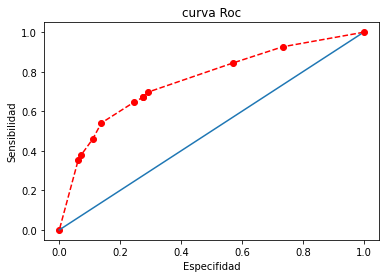

In [148]:
plt.plot(especifities,sensibilites, marker="o",linestyle="--",color="r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("Especifidad")
plt.ylabel("Sensibilidad")
plt.title("curva Roc")

In [149]:
# se puede hacer de forma automatica
from sklearn import metrics
# nos devuelve tres valores por eso usamos _
espec_1,sens, _ = metrics.roc_curve(Y_test,prob)

In [151]:
df = pd.DataFrame({
    "x":espec_1,"y":sens
})

In [152]:
df.head(5)

,x,y
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.032787
3,0.000898,0.032787
4,0.000898,0.040984


Text(0.5, 1.0, &#39;curva Roc&#39;)

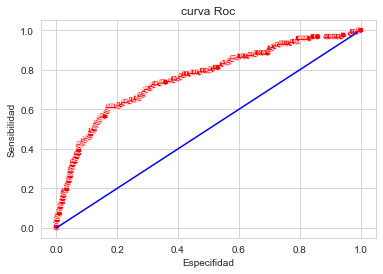

In [157]:
import seaborn as sns
sns.set_style("whitegrid")
sns.scatterplot("x","y",data=df, marker="o",linestyle="--",color="r")
sns.lineplot(x,y,color="b")

plt.xlabel("Especifidad")
plt.ylabel("Sensibilidad")
plt.title("curva Roc")


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prob))

In [158]:
# para calcular el area
auc = metrics.auc(espec_1,sens)
auc

0.7587485652058745

In [ ]:
## get the best threshold cuando es una imbalanced classification
from numpy import argmax

# calculate roc curves
fpr, tpr, thresholds = roc_curve(Y_test,prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

### como actuar cuando el data set no esta balanceado (como este por ejemplo, un 90 por ciento son 0 y el resto 1)
https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

### como escoger el threshold correcto en funcion de Roc
* segun lo que estemos buscando con el modelo (enfoque en lo positivo o negativo)
* https://medium.com/analytics-vidhya/a-guide-to-machine-learning-in-r-for-beginners-part-5-4c00f2366b90
* https://towardsdatascience.com/understanding-the-roc-and-auc-curves-a05b68550b69

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction_3))

### ojo ver kaglle y regresion lineal youtube.ipynb, hay muchas cosas interesantes ( ejemplro ref con cross validation, seabron, randomforest)